In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

/var/folders/55/sjtq6nw150907w7mjkqft1bw0000gn/T/ipykernel_32675/912229180.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
import sys
import os
import glob
import numpy as np
sys.path.append('/Users/tecork/Desktop/cDTI_Pipeline/Software')
from cDTIpy.Data_Import.Diffusion   import *
from cDTIpy.Data_Saving.Diffusion   import *
from cDTIpy.Data_Sorting.Diffusion  import *
from cDTIpy.Diffusion.Gibbs         import *
from cDTIpy.Diffusion.Registration  import *
from cDTIpy.Diffusion.Rejection     import *
from cDTIpy.Diffusion.Respiratory   import *
from cDTIpy.Diffusion.Averaging     import *
from cDTIpy.Diffusion.Denoising     import *
from cDTIpy.Diffusion.Interpolation import *
from cDTIpy.Diffusion.Segmentation_Matrix_DTI import *
from cDTIpy.Diffusion.Segmentation_Matrix_DWI import *

In [3]:
### User input
main_path            = '/Users/tecork/Desktop/cDTI_Pipeline/Data_In/Blip_Down_DICOMs'
data_folder          = 'DiVO_10_12'
outpath              = '/Users/tecork/Desktop/cDTI_Pipeline/Data_Out/Blip_Down_NifTis'

### User Settings
DICOM_reader_info         = 'ON'             # Flag to read from DICOM folder
operation_type            = 'Magnitude'      #

Gibbs_Mode                = 'ON'             # Flag to register data

Rejection_Mode            = 'ON'             # Flag to reject and replace bad acquisitions
NRMSE_Threshold           = 0.75
NSSIM_Threshold           = 0.75 
rejection_zoom            = 'ON'
rejection_IntEACT_zoom    = 'ON'
rejection_organ           = 'Heart'

Respiratory_Mode          = 'ON'             # Flag to reject and replace bad acquisitions
respiratory_zoom          = 'ON'
respiratory_IntERACT_zoom = 'ON'
respiratory_organ         = 'Liver'

Registration_Mode         = 'ON'             # Flag to register data
registration_algorithm    = 'Affine'         # Type of registration to perform
temporary_denoising       = 'OFF'

Averaging_Mode           = 'ON'             # Flag to average data

Denoising_Mode           = 'ON'             # Flag to average data
number_of_coils          = 20
denoising_algorithm      = 'LocalPCA'       # Type of denoising to perform

Interpolation_Mode       = 'ON'             # Flag to interpolate data

Extended_Matrix_Mode     = 'ON'             # Flag to interpolate data

E1_Mode                  = 'ON'


if registration_algorithm == 'Affine':
    sub_registration = 'Rigid'
if registration_algorithm == 'Rigid':
    sub_registration = 'Translation'
if registration_algorithm == 'Translation':
    sub_registration = 'Translation'

In [4]:
inpath               = os.path.join(main_path, data_folder)
out_path             = os.path.join(outpath,   data_folder)

if os.path.isdir(out_path) == False:
    os.makedirs(out_path)
### Put DTI data into one matrix
matrix_list    = []
b_vals_list    = []
b_vecs_list    = []
header_list    = []

[matrix, b_vals, b_vecs, Header] = DCM_Reader(inpath)
matrix_list.append(matrix)
b_vals_list.append(b_vals)
b_vecs_list.append(b_vecs)
header_list.append(Header)
    
temporary_matrix_stacked = matrix_list[0]
temporary_bvals_stacked  = b_vals_list[0]
temporary_bvecs_stacked  = b_vecs_list[0]
Header                   = header_list[0]

[temporary_matrix_sorted,  temporary_bvals_sorted,  temporary_bvecs_sorted] = stacked2sorted(temporary_matrix_stacked, 
                                                                                             temporary_bvals_stacked, 
                                                                                             temporary_bvecs_stacked)

/Users/tecork/Desktop/cDTI_Pipeline/Software/cDTIpy/Data_Import/Diffusion.py:309: UserWarning: The DICOM readers are highly experimental, unstable, and only work for Siemens time-series at the moment
Please use with caution.  We would be grateful for your help in improving them
  import nibabel.nicom.csareader as csareader                                                                                                   # Import csareader (Siemens) module


Number of Diffusion Directions: 66
Number of Slices: 3
Number of Columns: 100
Number of Rows: 100


Gibbs ringing removal mode is on.
Rejection mode is on.
Re-registering data prior to data rejection.
Temporary denoising is turned off.
Registering diffusion directions to first diffusion direction (b = 0) for each average.
Registering first diffusion direction (b = 0) to each average first diffusion direction (b = 0).
Finished registration.
ON
3
(100, 100, 3, 66)
1
SQUARE
2560
1440
1440
1368x1368+0+0
[[38, 37, 36], [60, 60, 60], [27, 26, 25], [50, 50, 50]]


/Users/tecork/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:339: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/Users/tecork/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:339: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/Users/tecork/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:339: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/Users/tecork/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:339: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)

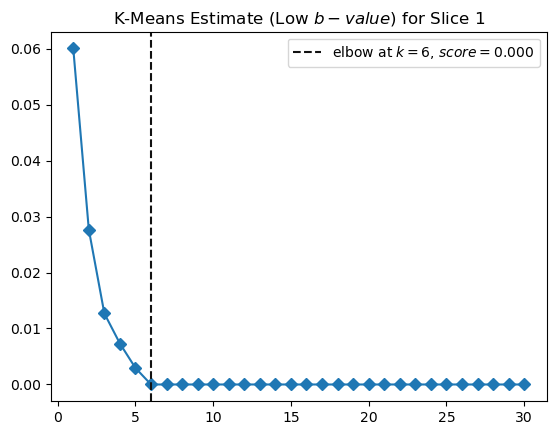

/Users/tecork/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1323: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


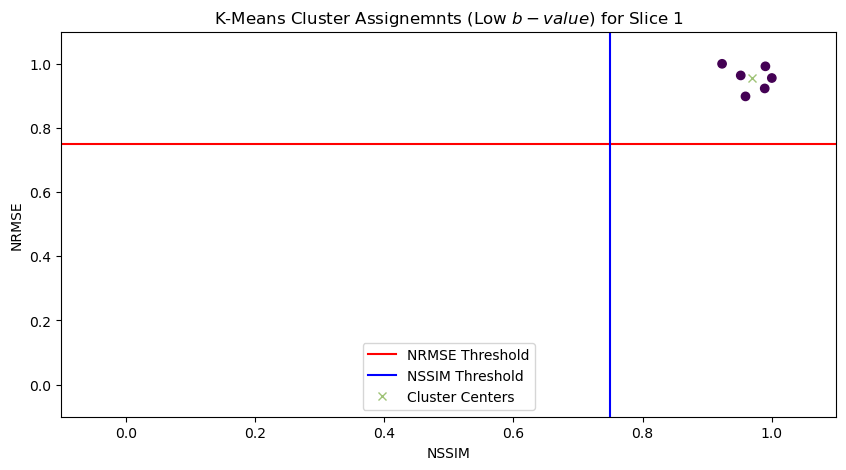

/Users/tecork/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:339: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/Users/tecork/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:339: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/Users/tecork/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:339: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/Users/tecork/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:339: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)

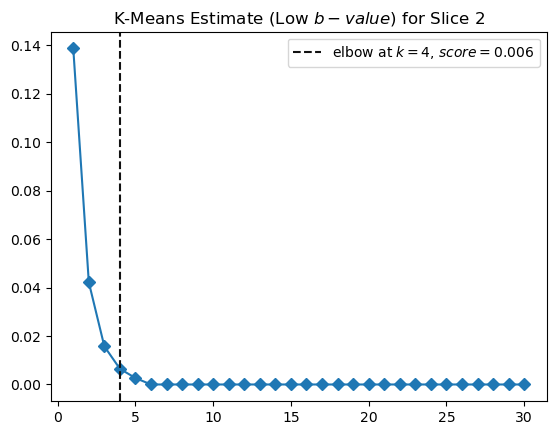

/Users/tecork/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1323: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


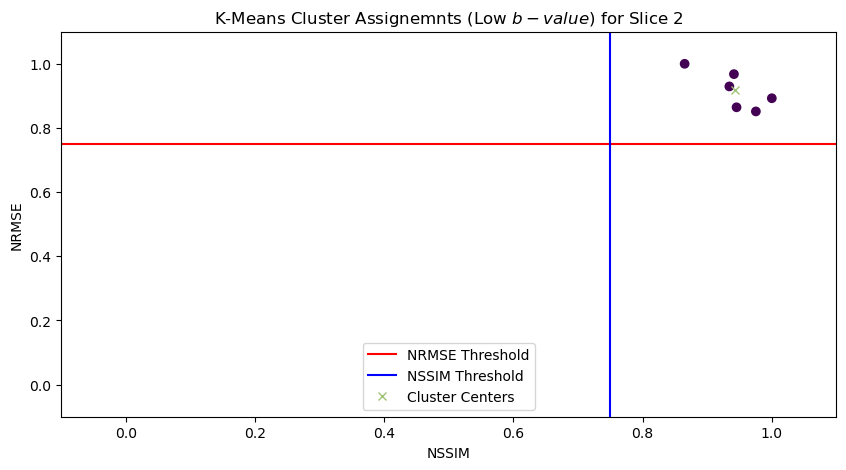

/Users/tecork/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:339: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/Users/tecork/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:339: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/Users/tecork/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:339: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)
/Users/tecork/opt/anaconda3/lib/python3.9/site-packages/yellowbrick/cluster/elbow.py:339: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  self.estimator.fit(X, **kwargs)

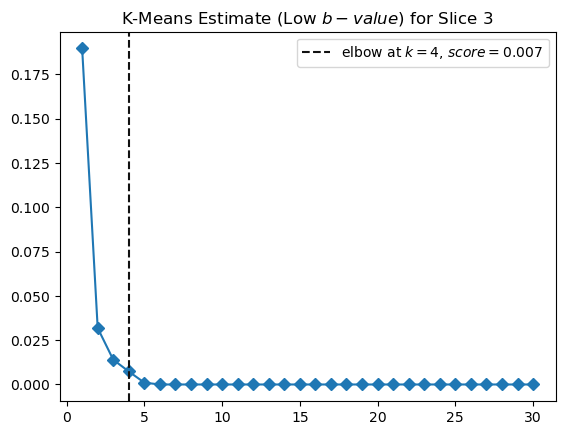

/Users/tecork/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1323: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


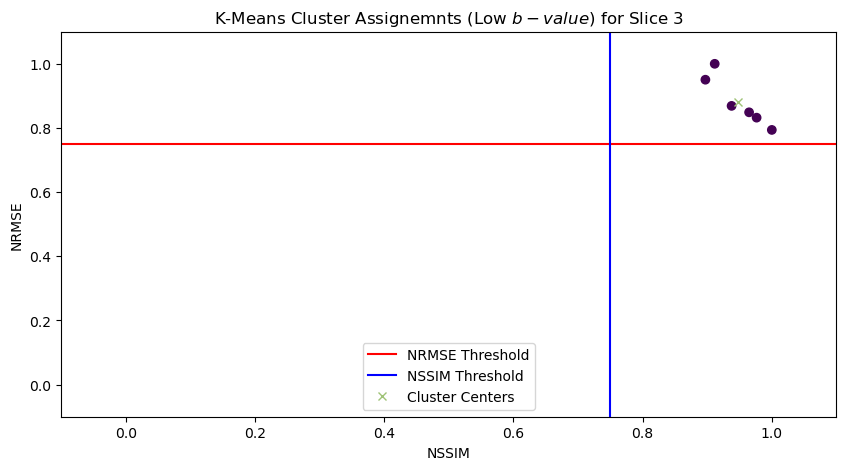

Overridding estimated number of clusters to be 5 clusters.


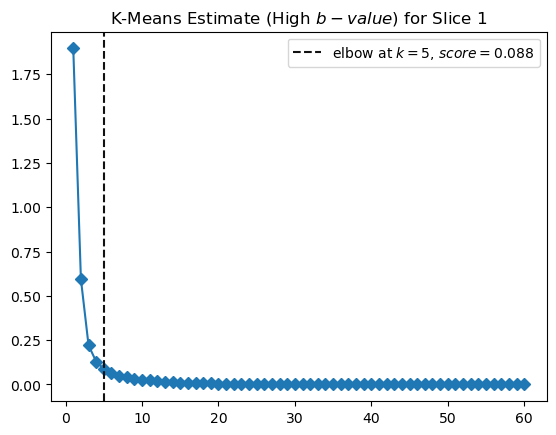

Initialization complete
Iteration 0, inertia 0.1361286329317657
Iteration 1, inertia 0.059479154610388954
Iteration 2, inertia 0.0533464364035183
Iteration 3, inertia 0.0529598345356947
Converged at iteration 3: strict convergence.


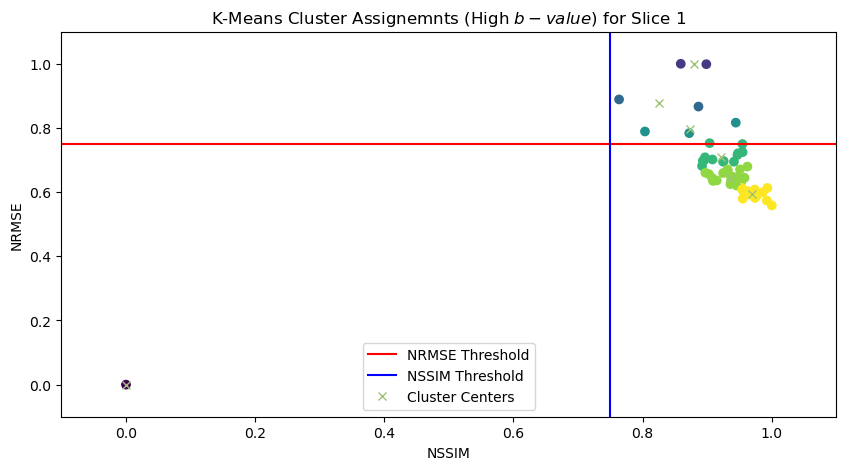

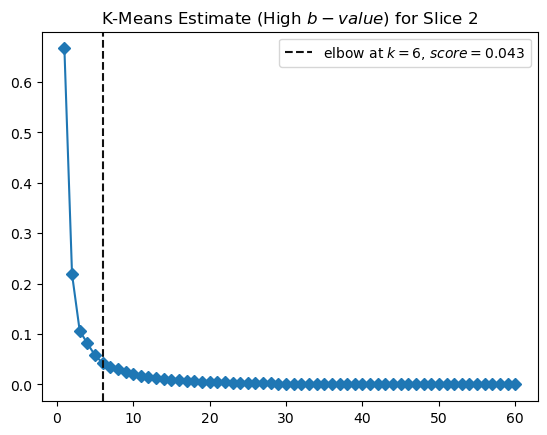

[[0.76590568 0.93813457]
 [0.81155676 0.87099582]
 [0.85720784 0.80385707]
 [0.90285892 0.73671833]
 [0.94851    0.66957958]
 [0.99416109 0.60244083]]
Initialization complete
Iteration 0, inertia 0.1793235976250273
Iteration 1, inertia 0.05453553298856453
Iteration 2, inertia 0.04468363989807957
Iteration 3, inertia 0.043851883509813935
Iteration 4, inertia 0.04365871237589017
Iteration 5, inertia 0.043503350203818986
Iteration 6, inertia 0.04335527356002669
Converged at iteration 6: strict convergence.


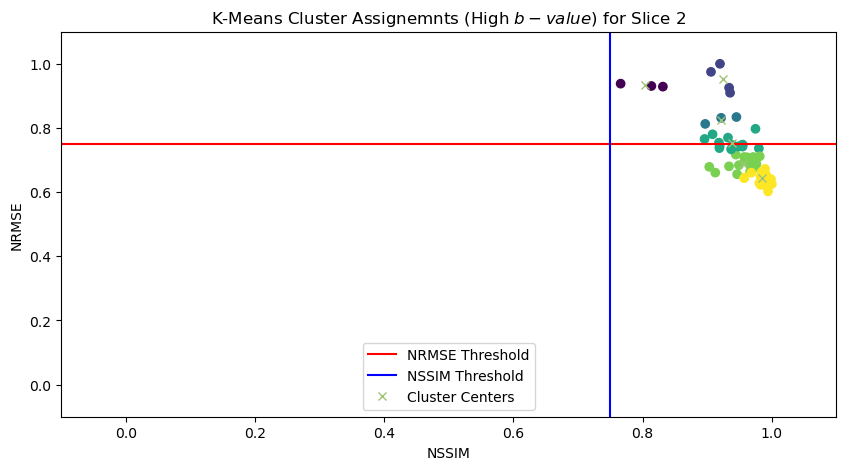

Overridding estimated number of clusters to be 5 clusters.


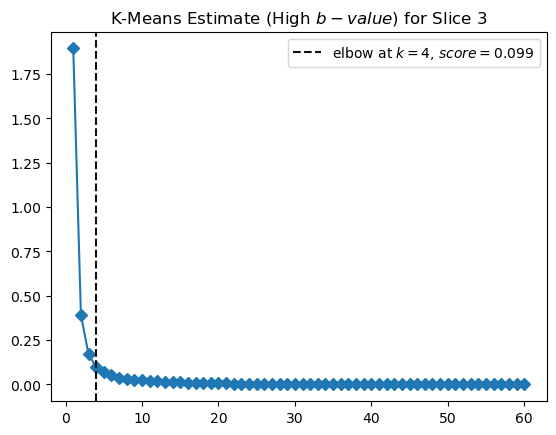

Initialization complete
Iteration 0, inertia 0.08848946371626956
Iteration 1, inertia 0.05431379469397925
Iteration 2, inertia 0.0531943045660868
Iteration 3, inertia 0.05296884192444209
Iteration 4, inertia 0.052112247018612244
Iteration 5, inertia 0.05128686771725777
Iteration 6, inertia 0.05094755901717753
Iteration 7, inertia 0.05021461771469662
Iteration 8, inertia 0.050126130162130425
Converged at iteration 8: strict convergence.


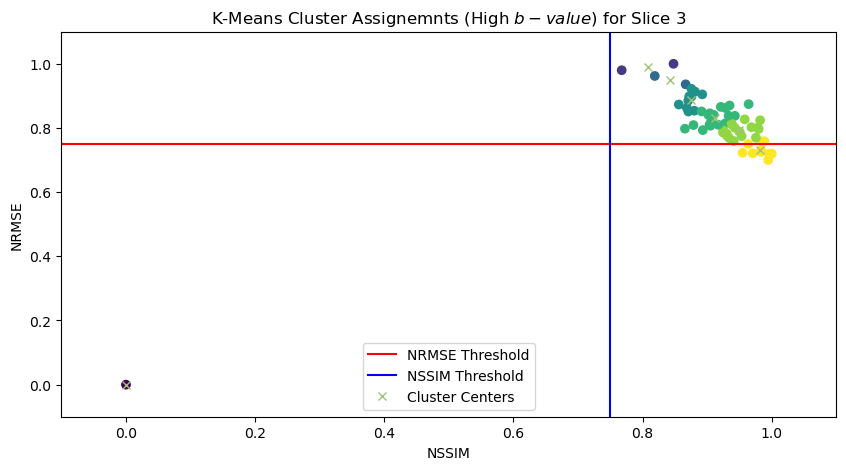

Acceptance rate for slice 1, direction 1: 100.0%
Acceptance rate for slice 1, direction 2: 100.0%
Acceptance rate for slice 1, direction 3: 100.0%
Acceptance rate for slice 1, direction 4: 100.0%
Acceptance rate for slice 1, direction 5: 100.0%
Acceptance rate for slice 1, direction 6: 100.0%
Acceptance rate for slice 1, direction 7: 100.0%
Acceptance rate for slice 1, direction 8: 100.0%
Acceptance rate for slice 1, direction 9: 66.7%
Acceptance rate for slice 1, direction 10: 83.3%
Acceptance rate for slice 1, direction 11: 100.0%
Acceptance rate for slice 2, direction 1: 100.0%
Acceptance rate for slice 2, direction 2: 100.0%
Acceptance rate for slice 2, direction 3: 83.3%
Acceptance rate for slice 2, direction 4: 100.0%
Acceptance rate for slice 2, direction 5: 100.0%
Acceptance rate for slice 2, direction 6: 100.0%
Acceptance rate for slice 2, direction 7: 83.3%
Acceptance rate for slice 2, direction 8: 83.3%
Acceptance rate for slice 2, direction 9: 100.0%
Acceptance rate for sli

/Users/tecork/Desktop/cDTI_Pipeline/Software/cDTIpy/Diffusion/Respiratory.py:111: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  normalized_entropy_image = entropy(image_normalization, disk(7))


For diffusion direction 1 on slice 2, SSIM is not enough: evaluating RSME
For diffusion direction 4 on slice 1, SSIM is not enough: evaluating RSME
For diffusion direction 4 on slice 2, SSIM is not enough: evaluating RSME
For diffusion direction 5 on slice 1, SSIM is not enough: evaluating RSME
For diffusion direction 10 on slice 0, SSIM is not enough: evaluating RSME
Registration mode is on.
Temporary denoising is turned off.
Registering diffusion directions to first diffusion direction (b = 0) for each average.
Registering first diffusion direction (b = 0) to each average first diffusion direction (b = 0).
Finished registration.
Averaging mode is on.
Re-registering data after data averaging.
Temporary denoising is turned off.
Registering diffusion directions to first diffusion direction (b = 0) for each average.
Registering first diffusion direction (b = 0) to each average first diffusion direction (b = 0).
Finished registration.
Denoising mode is on.
Denoising images using Local PCA

/Users/tecork/opt/anaconda3/lib/python3.9/site-packages/dipy/reconst/dti.py:498: RuntimeWarning: invalid value encountered in true_divide
  return 3 * np.sqrt(6) * determinant((A_squiggle / A_s_norm))


Primary Eigenvector mode is on.


In [5]:
########## DICOM Import Module #################################################################################################################
counter        = 0
counter_string = str(counter)
folder         = counter_string.zfill(2) + '_Original'
[temporary_matrix_sorted,  temporary_bvals_sorted,  temporary_bvecs_sorted]          = stacked2sorted(temporary_matrix_stacked, 
                                                                                                      temporary_bvals_stacked, 
                                                                                                      temporary_bvecs_stacked)
output_path = os.path.join(out_path, folder)
file_name   = 'Original'
Save_Diffusion_Image_Data(output_path, file_name, Header, temporary_matrix_sorted, temporary_bvals_sorted, temporary_bvecs_sorted)
del counter_string, folder, output_path
del temporary_matrix_stacked, temporary_bvals_stacked, temporary_bvecs_stacked
################################################################################################################################################
########## Gibb's Ringing Module ###############################################################################################################
if Gibbs_Mode == 'ON':
    counter        = counter + 1
    counter_string = str(counter)
    folder         = counter_string.zfill(2) + '_Unrung'
    print('Gibbs ringing removal mode is on.')
    ### Step 1: Perform Gibb's ringing removal on temporary sorted matrix
    [unrung_matrix_sorted, unrung_bvals_sorted, unrung_bvecs_sorted] = unrung(temporary_matrix_sorted, 
                                                                              temporary_bvals_sorted, 
                                                                              temporary_bvecs_sorted, 
                                                                              operation_type = operation_type)
    ### Step 2: Save unrung matrix
    output_path = os.path.join(out_path, folder)
    Save_Diffusion_Image_Data(output_path, 'Unrung', Header, unrung_matrix_sorted, unrung_bvals_sorted, unrung_bvecs_sorted)
    ### Step 3: Assign unrung variables to temporary variables to be overwritten
    temporary_matrix_sorted = unrung_matrix_sorted
    temporary_bvals_sorted  = unrung_bvals_sorted
    temporary_bvecs_sorted  = unrung_bvecs_sorted
    ### Step 4: Delete Variables
    del counter_string, folder, output_path
    del unrung_matrix_sorted, unrung_bvals_sorted, unrung_bvecs_sorted
if Gibbs_Mode == 'OFF':
    print('Gibbs ringing removal mode is off.')
################################################################################################################################################
########## Rejection Module ####################################################################################################################
if Rejection_Mode == 'ON':
    counter        = counter + 1
    counter_string = str(counter)
    folder         = counter_string.zfill(2) + '_Rejected'
    print('Rejection mode is on.')
    ### Step 1: Perform registration on temporary sorted matrix
    print('Re-registering data prior to data rejection.')
    [registered_matrix_sorted, registered_bvals_sorted, registered_bvecs_sorted] = register(temporary_matrix_sorted, 
                                                                                            temporary_bvals_sorted, 
                                                                                            temporary_bvecs_sorted,
                                                                                            registration_algorithm = sub_registration,
                                                                                            temporary_denoising    = temporary_denoising,
                                                                                            operation_type         = operation_type)
    ### Step 2: Perform rejection on registered sorted matrix
    [rejected_matrix_sorted, rejected_bvals_sorted, rejected_bvecs_sorted, _] = rejection(registered_matrix_sorted, 
                                                                                          registered_bvals_sorted, 
                                                                                          registered_bvecs_sorted,
                                                                                          NRMSE_threshold = NRMSE_Threshold, 
                                                                                          NSSIM_threshold = NSSIM_Threshold, 
                                                                                          zoom            = rejection_zoom, 
                                                                                          IntERACT_zoom   = rejection_IntEACT_zoom, 
                                                                                          operation_type  = operation_type)

    ### Step 3: Save registered stacked matrix (DiPy format)
    output_path = os.path.join(out_path, folder)
    Save_Diffusion_Image_Data(output_path, 'Rejected', Header, rejected_matrix_sorted, rejected_bvals_sorted, rejected_bvecs_sorted)
    ### Step 4: Assign registered stacked variables to temporary variables to be overwritten
    temporary_matrix_sorted = rejected_matrix_sorted
    temporary_bvals_sorted  = rejected_bvals_sorted
    temporary_bvecs_sorted  = rejected_bvecs_sorted
    ### Step 5: Delete Variables
    del counter_string, folder, output_path
    del rejected_matrix_sorted, rejected_bvals_sorted, rejected_bvecs_sorted
    del registered_matrix_sorted, registered_bvals_sorted, registered_bvecs_sorted
if Rejection_Mode == 'OFF':
    print('Rejection mode is off.')
################################################################################################################################################
########## Respiratory Module ##################################################################################################################
if Respiratory_Mode == 'ON':
    counter        = counter + 1
    counter_string = str(counter)
    folder         = counter_string.zfill(2) + '_Respiratory_Sorted'
    print('Respiratory sorting mode is on.')
    ### Step 1: Perform registration on temporary sorted matrix
    print('Re-registering data prior data reordering.')
    [registered_matrix_sorted, registered_bvals_sorted, registered_bvecs_sorted] = register(temporary_matrix_sorted,
                                                                                            temporary_bvals_sorted, 
                                                                                            temporary_bvecs_sorted, 
                                                                                            registration_algorithm = registration_algorithm,
                                                                                            temporary_denoising    = temporary_denoising,
                                                                                            operation_type         = operation_type)
    ### Step 2: Perform respiratory sorting on rejected sorted matrix
    [respiratory_matrix_sorted, respiratory_bvals_sorted, respiratory_bvecs_sorted] = respiratory_ordering(registered_matrix_sorted,
                                                                                                           registered_bvals_sorted, 
                                                                                                           registered_bvecs_sorted,
                                                                                                           zoom           = respiratory_zoom,
                                                                                                           IntERACT_zoom  = respiratory_IntERACT_zoom, 
                                                                                                           organ          = respiratory_organ,
                                                                                                           operation_type = operation_type)

    ### Step 3: Save registered stacked matrix (DiPy format)
    output_path = os.path.join(out_path, folder)
    Save_Diffusion_Image_Data(output_path, 'Respiratory_Ordered', Header, respiratory_matrix_sorted, respiratory_bvals_sorted, respiratory_bvecs_sorted)
    ### Step 4: Assign registered stacked variables to temporary variables to be overwritten
    temporary_matrix_sorted = respiratory_matrix_sorted
    temporary_bvals_sorted  = respiratory_bvals_sorted
    temporary_bvecs_sorted  = respiratory_bvecs_sorted
    ### Step 5: Delete Variables
    del counter_string, folder, output_path
    del respiratory_matrix_sorted, respiratory_bvals_sorted, respiratory_bvecs_sorted
    del registered_matrix_sorted, registered_bvals_sorted, registered_bvecs_sorted
if Rejection_Mode == 'OFF':
    print('Rejection mode is off.')
################################################################################################################################################
########## Registration Module #################################################################################################################
if Registration_Mode == 'ON':
    counter        = counter + 1
    counter_string = str(counter)
    folder         = counter_string.zfill(2) + '_Registered'
    print('Registration mode is on.') 
    ### Step 1: Perform registration on temporary sorted matrix
    [registered_matrix_sorted, registered_bvals_sorted, registered_bvecs_sorted] = register(temporary_matrix_sorted,
                                                                                            temporary_bvals_sorted, 
                                                                                            temporary_bvecs_sorted, 
                                                                                            registration_algorithm = registration_algorithm,
                                                                                            temporary_denoising    = temporary_denoising,
                                                                                            operation_type         = operation_type)
    ### Step 2: Save registered stacked matrix (DiPy format)
    output_path = os.path.join(out_path, folder)
    Save_Diffusion_Image_Data(output_path, 'Registered', Header, registered_matrix_sorted, registered_bvals_sorted, registered_bvecs_sorted)
    ### Step 3: Assign registered stacked variables to temporary variables to be overwritten
    temporary_matrix_sorted = registered_matrix_sorted
    temporary_bvals_sorted  = registered_bvals_sorted
    temporary_bvecs_sorted  = registered_bvecs_sorted
    ### Step 4: Delete Variables
    del counter_string, folder, output_path
    del registered_matrix_sorted, registered_bvals_sorted, registered_bvecs_sorted
if Registration_Mode == 'OFF':
    print('Registration mode is off.')
################################################################################################################################################
########## Averaging Module ####################################################################################################################
if Averaging_Mode == 'ON':
    counter        = counter + 1
    counter_string = str(counter)
    folder         = counter_string.zfill(2) + '_Averaged'
    print('Averaging mode is on.')
    ### Step 1: Perform averaging on temporary sorted matrix
    [averaged_matrix_sorted, averaged_bvals_sorted, averaged_bvecs_sorted] = average(temporary_matrix_sorted, 
                                                                                     temporary_bvals_sorted, 
                                                                                     temporary_bvecs_sorted,
                                                                                     operation_type = operation_type)
    print('Re-registering data after data averaging.')
    ### Step 2: Perform registration on average sorted matrix
    [registered_matrix_sorted, registered_bvals_sorted, registered_bvecs_sorted] = register(averaged_matrix_sorted,
                                                                                            averaged_bvals_sorted, 
                                                                                            averaged_bvecs_sorted, 
                                                                                            registration_algorithm = registration_algorithm,
                                                                                            temporary_denoising    = temporary_denoising,
                                                                                            operation_type         = operation_type)
    ### Step 3: Save averaged stacked matrix (DiPy format)
    output_path = os.path.join(out_path, folder)
    Save_Diffusion_Image_Data(output_path, 'Averaged', Header, registered_matrix_sorted, registered_bvals_sorted, registered_bvecs_sorted)
    ### Step 4: Assign registered stacked variables to temporary variables to be overwritten
    temporary_matrix_sorted = registered_matrix_sorted
    temporary_bvals_sorted  = registered_bvals_sorted
    temporary_bvecs_sorted  = registered_bvecs_sorted
    ### Step 5: Delete Variables
    del counter_string, folder, output_path
    del averaged_matrix_sorted, averaged_bvals_sorted, averaged_bvecs_sorted 
    del registered_matrix_sorted, registered_bvals_sorted, registered_bvecs_sorted
if Averaging_Mode == 'OFF':
    print('Averaging mode is off.')
################################################################################################################################################
########## Denoising Module ####################################################################################################################
if Denoising_Mode == 'ON':
    counter        = counter + 1
    counter_string = str(counter)
    folder         = counter_string.zfill(2) + '_Denoised'
    print('Denoising mode is on.')
    ### Step 1: Perform denoising on temporary stacked matrix
    [denoised_matrix_sorted, denoised_bvals_sorted, denoised_bvecs_sorted] = denoise(temporary_matrix_sorted, 
                                                                                     temporary_bvals_sorted, 
                                                                                     temporary_bvecs_sorted,
                                                                                     denoising_algorithm = denoising_algorithm,
                                                                                     operation_type      = operation_type)
    ### Step 2: Save denoised stacked matrix (DiPy format)
    output_path = os.path.join(out_path, folder)
    Save_Diffusion_Image_Data(output_path, 'Denoised', Header, denoised_matrix_sorted, denoised_bvals_sorted, denoised_bvecs_sorted)
    ### Step 3: Assign registered stacked variables to temporary variables to be overwritten
    temporary_matrix_sorted = denoised_matrix_sorted
    temporary_bvals_sorted  = denoised_bvals_sorted
    temporary_bvecs_sorted  = denoised_bvecs_sorted
    ### Step 4: Delete Variables
    del counter_string, folder, output_path
    del denoised_matrix_sorted, denoised_bvals_sorted, denoised_bvecs_sorted
if Denoising_Mode == 'OFF':
    print('Denoising mode is off.')
################################################################################################################################################
########## Interpolation Module ################################################################################################################
if Interpolation_Mode == 'ON':
    counter        = counter + 1
    counter_string = str(counter)
    folder         = counter_string.zfill(2) + '_Interpolated'
    print('Interpolating mode is on.')
    ### Step 1: Perform averaging on temporary sorted matrix
    [interpolated_matrix_sorted, interpolated_bvals_sorted, interpolated_bvecs_sorted] = zero_filled(temporary_matrix_sorted, 
                                                                                                     temporary_bvals_sorted, 
                                                                                                     temporary_bvecs_sorted,
                                                                                                     operation_type = operation_type)
    ### Step 2: Save averaged stacked matrix (DiPy format)
    output_path = os.path.join(out_path, folder)
    Header['X Resolution'] = Header['X Resolution'] / 2
    Header['Y Resolution'] = Header['Y Resolution'] / 2    
    Save_Diffusion_Image_Data(output_path, 'Interpolated', Header, interpolated_matrix_sorted, interpolated_bvals_sorted, interpolated_bvecs_sorted)
    ### Step 3: Assign registered stacked variables to temporary variables to be overwritten
    temporary_matrix_sorted = interpolated_matrix_sorted
    temporary_bvals_sorted  = interpolated_bvals_sorted
    temporary_bvecs_sorted  = interpolated_bvecs_sorted
    ### Step 4: Delete Variables
    del counter_string, folder, output_path
    del interpolated_matrix_sorted, interpolated_bvals_sorted, interpolated_bvecs_sorted
if Interpolation_Mode == 'OFF':
    print('Interpolating mode is off.')
################################################################################################################################################
########## Extended Matrix Module ##############################################################################################################
if Extended_Matrix_Mode == 'ON':
    counter        = counter + 1
    counter_string = str(counter)
    folder         = counter_string.zfill(2) + '_Extended_Matrix'
    print('Extended matrix mode is on.')
    ### Step 1: Perform 
    [segmentation_matrix, segmentation_bvals, segmentation_bvecs] = DTI_segmentation_matrix(temporary_matrix_sorted, 
                                                                                            temporary_bvals_sorted, 
                                                                                            temporary_bvecs_sorted)
    [segmentation_matrix, segmentation_bvals, segmentation_bvecs] = stacked2sorted(segmentation_matrix, 
                                                                                   segmentation_bvals, 
                                                                                   segmentation_bvecs)
    ### Step 2: Save averaged stacked matrix (DiPy format)
    output_path = os.path.join(out_path, folder)
    Save_Diffusion_Image_Data(output_path, 'Extended_Matrix', Header, segmentation_matrix, segmentation_bvals, segmentation_bvecs)
    ### Step 3: Delete Variables
    del counter_string, folder, output_path
    del segmentation_matrix, segmentation_bvals, segmentation_bvecs
if Extended_Matrix_Mode == 'OFF':
    print('Extended matrix mode is off.')
################################################################################################################################################
########## Primary Eigenvector Map Module ######################################################################################################
if E1_Mode == 'ON':
    counter        = counter + 1
    counter_string = str(counter)
    folder         = counter_string.zfill(2) + '_Primary_Eigenvector'
    output_path    = os.path.join(out_path, folder)
    print('Primary Eigenvector mode is on.')
    Save_Primary_Eigenvector_Data(output_path, Header, temporary_matrix_sorted, temporary_bvals_sorted, temporary_bvecs_sorted)
if E1_Mode == 'OFF':
    print('Primary eigenvector mode is off.')
################################################################################################################################################